# Deeplab

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [2]:
sz = 256
num_slice = 9

num_gpus = 2
gpu_start = 4
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
# device_ids = [0,1,4,5]
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

model_name = 'deeplab'
datapaths = ['data/train/AOI_2_Vegas_Train', 'data/train/AOI_3_Paris_Train', 'data/train/AOI_4_Shanghai_Train', 'data/train/AOI_5_Khartoum_Train']
datapath = datapaths[3]

## Scripting

In [1]:
%%time
%run script 3 --gpu_start=6 --num_gpus=2 --bs=20 --learn --rescale --lr 1e-7 \
    --use_wd_sched --wd 0.025 --n_cycles 4


Data finished loading: data/train/AOI_5_Khartoum_Train


epoch      trn_loss   val_loss   fscore                    
    0      0.259267   0.248279   0.159846  
    1      0.258443   0.28548    0.171637                  
    2      0.2538     0.254071   0.171748                  
    3      0.253219   0.25726    0.159753                  
    4      0.25343    0.25539    0.172823                  
    5      0.252753   0.338694   0.174545                  
    6      0.252176   0.244163   0.167544                  
    7      0.255356   0.266369   0.174417                  
    8      0.257679   0.265707   0.17749                   
    9      0.257601   0.244048   0.174968                  
    10     0.254622   0.256599   0.167112                  
    11     0.255155   0.26533    0.17459                   
    12     0.256454   0.238638   0.171098                  
    13     0.25376    0.245835   0.165757                  
    14     0.256235   0.248465   0.173153                  
    15     0.253798   0.245842   0.168592               

In [3]:
data = None
is_eval, is_pred = False, False

In [4]:
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                        is_eval=is_eval, is_pred=is_pred)
(trn_x,trn_y), (val_x,val_y) = data
learn.load('deeplab-5')


Data finished loading: data/train/AOI_5_Khartoum_Train


epoch      trn_loss   val_loss   mask_acc                    
    0      0.20217    0.174141   0.161028  
    1      0.204909   0.173566   0.161028                    
    2      0.19946    0.171657   0.161028                    
    3      0.203211   0.173154   0.161028                    
    4      0.202982   0.177144   0.161028                    
    5      0.201171   0.176154   0.161028                    
    6      0.201947   0.172843   0.161028                    
    7      0.203337   0.172847   0.161028                    
    8      0.203241   0.177292   0.161028                    
 39%|███▉      | 54/137 [01:21<02:04,  1.50s/it, loss=0.2]      12     0.205468   0.176172   0.161028  
    13     0.20099    0.176319   0.161028                    

CPU times: user 7h 54s, sys: 3h 43min 14s, total: 10h 44min 9s
Wall time: 1h 4min 23s


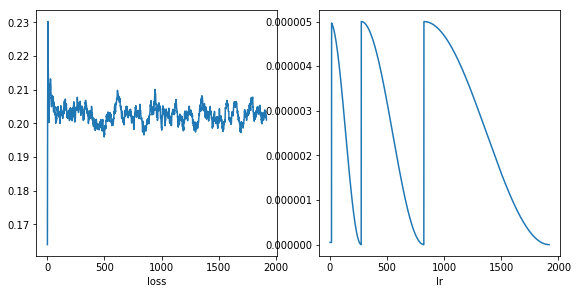

In [5]:
%%time
lr = 1e-5 / 2
lrs = np.array([lr/9, lr])
wd = 0.010
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 2, 'deeplab-5', lrs=lrs, n_cycles=3, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-5')

HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

  0%|          | 0/213 [00:00<?, ?it/s]                     


Exception in thread Thread-10:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc                    
    0      0.368461   0.322855   0.854456  
    1      0.341542   0.323199   0.855536                    
    2      0.33015    0.432576   0.832731                    
    3      0.309468   0.275996   0.8795                      
    4      0.300727   0.261658   0.878648                    
    5      0.298073   0.263435   0.879748                    
    6      0.30138    0.261376   0.881917                    
    7      0.297154   0.471762   0.835254                    
    8      0.282376   0.270576   0.882443                    
    9      0.278966   0.255312   0.886976                    
    10     0.275453   0.237862   0.891153                    
    11     0.267814   0.23306    0.893853                    
    12     0.270264   0.236141   0.893117                    
    13     0.264459   0.229375   0.896624                    
    14     0.27849    0.271753   0.882328                    
    15     0.272146   0.33

TypeError: mkdir() got an unexpected keyword argument 'parent'

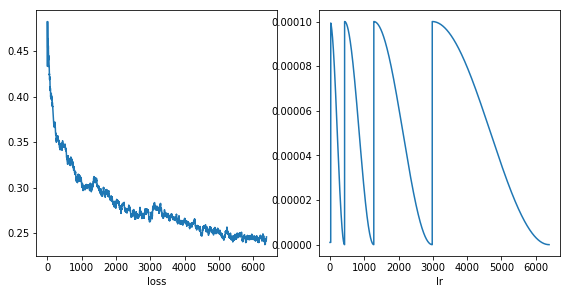

In [16]:
%%time
lr = 1e-4
lrs = np.array([lr/9, lr])
wd = 0.010
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-5', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-5')

In [13]:
learn.lr_find()
learn.sched.plot()

  0%|          | 0/362 [00:00<?, ?it/s]                      

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

HBox(children=(IntProgress(value=0, description='Epoch', max=62), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc                    
    0      0.246224   0.204177   0.909454  
    1      0.241396   0.283199   0.882517                    
    2      0.244631   0.252849   0.891415                    
    3      0.250693   0.206008   0.909208                    
    4      0.240931   0.210588   0.906349                    
    5      0.238993   0.203411   0.910105                    
    6      0.239146   0.201179   0.91117                     
    7      0.239586   0.206427   0.906271                    
    8      0.241422   0.210187   0.905512                    
    9      0.239261   0.209062   0.906313                    
    10     0.242341   0.208648   0.906991                    
    11     0.238792   0.216398   0.901955                    
    12     0.244132   0.236811   0.898318                    
    13     0.240027   0.211835   0.905972                    
    14     0.241755   0.204899   0.910206                    
    15     0.238163   0.21

TypeError: mkdir() got an unexpected keyword argument 'parent'

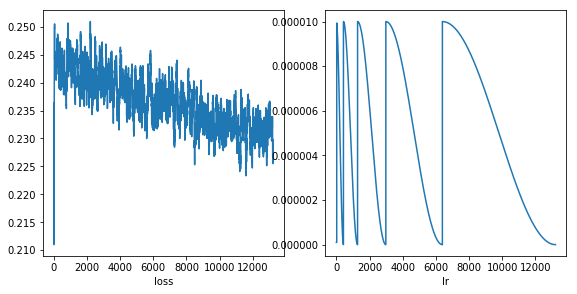

In [17]:
%%time
lr = 1e-5
lrs = np.array([lr/9, lr])
wd = 0.010
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-5', lrs=lrs, n_cycles=5, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-5')